In [1]:
!pip install ultralytics
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [32]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Sửa lại đường dẫn của file trong driver
yolo_model_path = "/content/drive/MyDrive/ML/yolo11l_finetune.pt"
rtdetr_model_path = "/content/drive/MyDrive/ML/RT_DETR_finetune.pt"
rcnn_model_path = "/content/drive/MyDrive/ML/fasterrcnn_finetune.pth"

In [10]:
yolo_model = YOLO(yolo_model_path)
rtdetr_model = YOLO(rtdetr_model_path)

In [33]:
import cv2
# Sửa đường dẫn ảnh cần predict
img = cv2.imread("/content/drive/MyDrive/ML/trash.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
yolo_results = yolo_model(img_rgb)[0]


0: 640x640 1 Plastic, 2464.3ms
Speed: 30.8ms preprocess, 2464.3ms inference, 33.6ms postprocess per image at shape (1, 3, 640, 640)


In [15]:
yolo_annotated = yolo_results.plot()

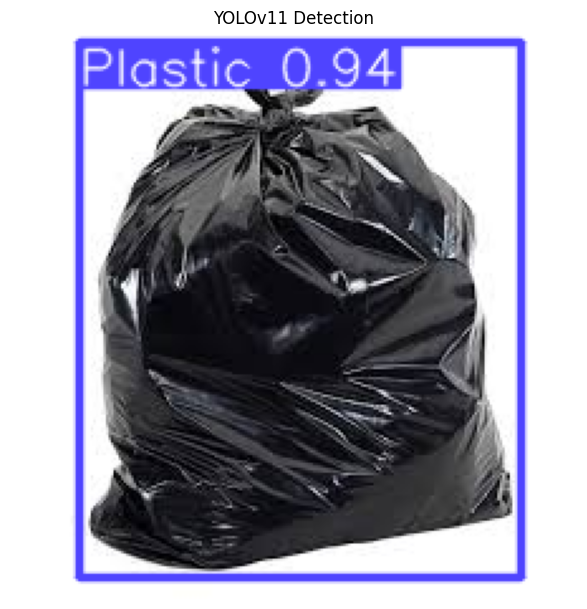

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("YOLOv11 Detection")
plt.imshow(yolo_annotated)
plt.axis("off")
plt.tight_layout()
plt.show()

In [17]:
rtdetr_results = rtdetr_model(img_rgb)[0]


0: 640x640 1 Plastic, 2881.6ms
Speed: 5.3ms preprocess, 2881.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [18]:
rtdetr_annotated = rtdetr_results.plot()

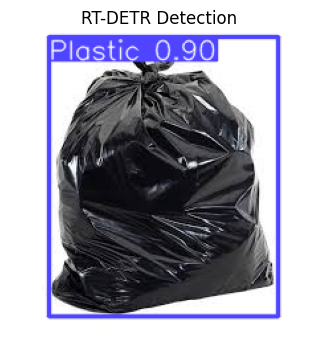

In [19]:
plt.subplot(1, 2, 2)
plt.title("RT-DETR Detection")
plt.imshow(rtdetr_annotated)
plt.axis("off")
plt.tight_layout()
plt.show()

In [23]:
import cv2
import torch
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

In [29]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = rcnn_model_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 9
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)
outputs = predictor(img)

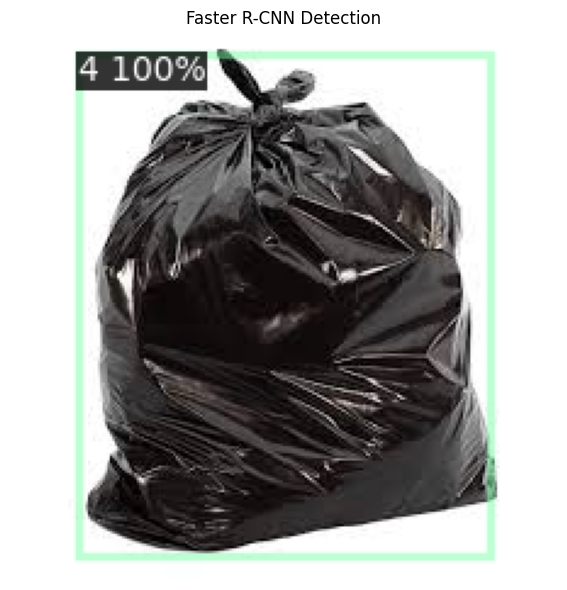

In [30]:
v = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("my_dataset"), scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Hiển thị
plt.figure(figsize=(10, 6))
plt.imshow(out.get_image()[:, :, ::-1])
plt.title("Faster R-CNN Detection")
plt.axis("off")
plt.tight_layout()
plt.show()